In [1]:
import pandas as pd  #data manipulation
import numpy as np #calculations
import matplotlib.pyplot as plt #basic visualization
import seaborn as sns #adv visualization

In [ ]:
products = pd.read_excel("Myntra dataset.xlsx", sheet_name = "dim_products")
products

In [ ]:
customers = pd.read_excel("Myntra dataset.xlsx", sheet_name = "dim_customers")
customers

In [ ]:
orders = pd.read_excel("Myntra dataset.xlsx", sheet_name = "fact_orders")
orders
     

In [ ]:
products.info()

In [ ]:
customers.info()

In [ ]:
orders.info()

In [ ]:
orders.describe()

In [ ]:
#Check for duplicates

products.duplicated().sum()
customers.duplicated().sum()
orders.duplicated().sum()
     

In [13]:
products.duplicated().sum()


np.int64(0)

In [ ]:
products.drop_duplicates()

In [ ]:
orders["Month"] = orders["Date"].dt.strftime("%B")
orders

In [ ]:
orders["Total Price"] = orders["Original Price"] - (orders["Original Price"] * orders["Discount%"])
orders

In [ ]:
gb = orders.groupby("Month").agg({"Total Price":"sum"})
gb

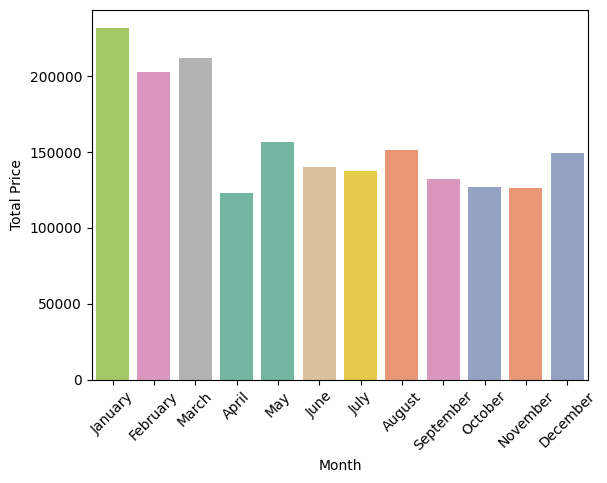

In [31]:
sns.barplot(x = gb.index, y = gb["Total Price"], order = ["January", "February", "March",'April',"May","June","July","August","September","October","November", "December"],hue = gb.index, palette = "Set2")
plt.xticks(rotation = 45)
plt.show()
     

In [ ]:
df = pd.merge(left = orders, right= products, on = "Product ID", how = "inner" )
df
    

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Month,Total Price,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,OD0001,C001,P0001,2021-05-20,349,0.30,May,244.30,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,OD0002,C002,P0001,2021-01-19,350,0.30,January,245.00,Women,Topwear,T-Shirts,Roadster,40,Black,4
2,OD0003,C003,P0001,2021-10-28,351,0.30,October,245.70,Women,Topwear,T-Shirts,Roadster,40,Black,4
3,OD0004,C004,P0001,2021-05-20,352,0.25,May,264.00,Women,Topwear,T-Shirts,Roadster,40,Black,4
4,OD0005,C005,P0001,2022-11-08,353,0.25,November,264.75,Women,Topwear,T-Shirts,Roadster,40,Black,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,January,342.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3496,OD3497,C082,P3071,2022-07-08,707,0.50,July,353.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,February,909.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3498,OD3499,C084,P3071,2021-07-18,856,0.50,July,428.00,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4


In [ ]:
gb1 = df.groupby("Category").agg({"Total Price":"sum"})
gb1

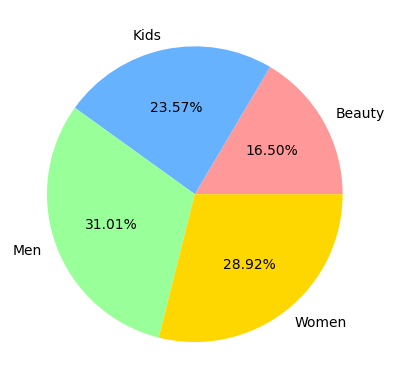

In [26]:
colors = ["#FF9999", "#66B2FF", "#99FF99", "#FFD700"]
plt.pie(gb1["Total Price"], labels = gb1.index, autopct = "%1.2f%%" ,colors = colors )
plt.show()

In [22]:
df["Total Price"].sum()

np.float64(1891089.6800000002)